In [35]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from readPatchOutput import *
np.set_printoptions(threshold=np.inf)

repeat = 3
n_pic = 2
nV1 = 1024
nblock = 5
nE = 768
pixel = '16'
Epick = []
Ipick = []
for i in range(nblock):
    for j in range(nV1):
        if j <nE:
            Epick.append(i*nV1+j)
        else:
            Ipick.append(i*nV1+j)

In [36]:
res_fdr = '/root/autodl-tmp/ljy/resource_repeat/'
setup_fdr = '/root/autodl-tmp/ljy/resource_repeat/'
data_fdr = '/root/autodl-tmp/ljy/data_repeat_onlyLGN_nonoise_minimaltest/'
output_suffix = 'repeat_'
nLGN = 512
nt = 8000

cfg = []
fr = []
LGN = np.empty((n_pic,repeat,nLGN,nt))
for k in range(1,n_pic+1):
    #读取参数文件
    for i in range(1,repeat+1):
        with open(res_fdr+f'drifting_color_{k}_cfg.bin') as f:
            sf = np.fromfile(f,'f4',1)[0]
            ori = np.fromfile(f,'f4',1)[0]
            phase = np.fromfile(f,'f4',1)[0]
            c = np.fromfile(f,'f4',1)[0]
        cfg.append([sf,ori,phase,c])

        #读取文件
        with open(data_fdr+'sample_spikeCount_'+output_suffix+str(i)+'_'+str(k)+'.bin') as f:
            sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
            sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
            nt = np.fromfile(f, 'u4', 1)[0]
            nLGN = np.fromfile(f, 'u4', 1)[0]
            LGN_spike_time = np.fromfile(f, 'f4', nLGN*nt)
            sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
            sample_spikeCount = np.fromfile(f, 'f4', sampleSize)
            # print(LGN_spike_time.sum())
            print(LGN_spike_time[LGN_spike_time>0][:100])
            # print(sample_spikeCount.sum())
        LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
        LGN[k-1,i-1,:,:] = LGN_spike_time
        fr.append(sample_spikeCount)
    print(k)
fr = np.array(fr).reshape(n_pic, repeat, -1)
# LGN = np.aray(LGN).reshape(n_pic,repeat,nLGN,nt)
cfg = np.array(cfg)
nOri = 6

[1.4455011 1.608429  1.542691  1.3290305 1.8952571 1.2691233 1.0063902
 1.082411  1.8648294 1.8706598 1.5201027 1.0560995 1.7827585 1.6601853
 1.7291278 1.5792086 1.1514299 1.486778  1.3010323 1.9095471 1.5599637
 1.2837571 1.2593627 1.4613707 1.708503  1.1598219 1.7972525 1.394039
 1.0428745 1.8062106 1.3854991 1.6071413 1.2905927 1.5764835 1.2345065
 1.6067097 1.6817303 1.1627772 1.5606698 1.3463778 1.4499499 1.6100526
 1.7495562 1.6916008 1.0814714 1.7010412 1.8213224 1.8134303 1.2157246
 1.60643   1.472645  1.0646225 1.0726368 1.7143006 1.247876  1.8095263
 1.4748763 1.8302627 1.1636392 1.5543511 1.6962676 1.0824463 1.0731769
 1.972944  1.910697  1.7258593 1.4058717 1.9347812 1.5676255 1.1170516
 1.3217831 1.2993689 1.0180883 1.3159857 1.7336912 1.5976748 1.8374591
 1.9562515 1.506829  1.1339633 1.5126765 1.249469  1.2141649 1.785305
 1.6660821 1.164008  1.3814149 1.8924422 1.3327435 1.3414569 1.5339041
 1.7723261 1.4342834 1.0142362 1.6968596 1.4473457 1.3176203 1.3856966
 1.86321

In [37]:
#(n_pic,repeat,nV1)
fr[1,:,:].max()

442.67105

In [38]:
fr.shape

(2, 3, 3840)

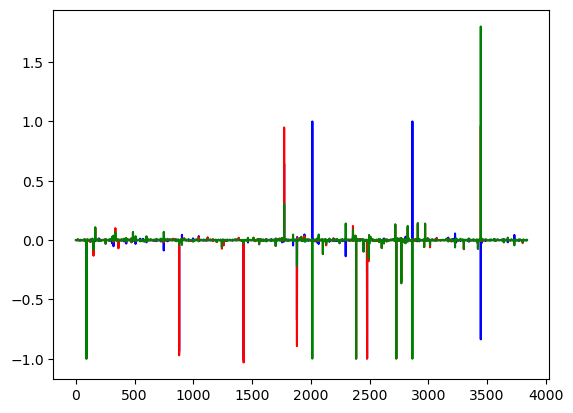

In [39]:
plt.plot(np.arange(nE*nblock),fr[1,0,:]-fr[1,1,:],'b')
plt.plot(np.arange(nE*nblock),fr[1,0,:]-fr[1,2,:],'r')
plt.plot(np.arange(nE*nblock),fr[1,1,:]-fr[1,2,:],'g')

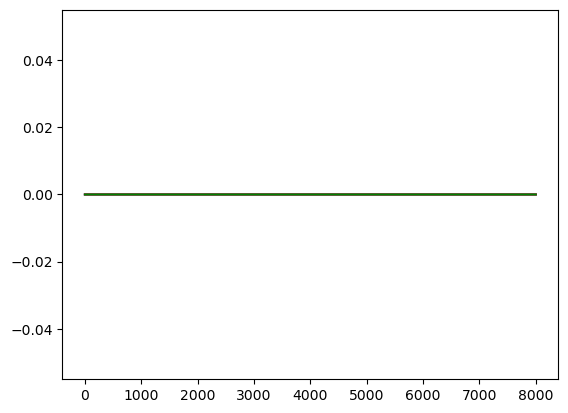

In [34]:
plt.plot(np.arange(nt),LGN[1,0,0,:]-LGN[1,1,0,:],'b')
plt.plot(np.arange(nt),LGN[1,0,0,:]-LGN[1,2,0,:],'r')
plt.plot(np.arange(nt),LGN[1,1,0,:]-LGN[1,2,0,:],'g')

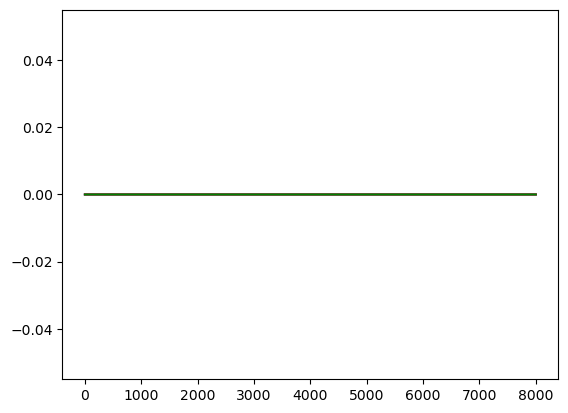

In [21]:
plt.plot(np.arange(nt),LGN[0,0,0,:]-LGN[0,1,0,:],'b')
plt.plot(np.arange(nt),LGN[0,0,0,:]-LGN[0,2,0,:],'r')
plt.plot(np.arange(nt),LGN[0,1,0,:]-LGN[0,2,0,:],'g')

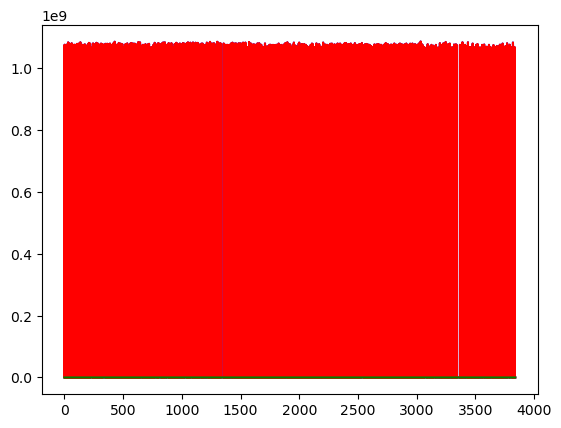

In [20]:
plt.plot(np.arange(nE*nblock),fr[0,0,:]-fr[0,1,:],'b')
plt.plot(np.arange(nE*nblock),fr[0,0,:]-fr[0,2,:],'r')
plt.plot(np.arange(nE*nblock),fr[0,1,:]-fr[0,2,:],'g')

In [21]:
fr

array([[[         0,          0, 1073888260,          0, 1073770188,
                  0,          0,          0, 1065353216,          0,
                  0,          0,          0, 1067344552, 1073743244,
                  0, 1065353216, 1073741849,          0,          0,
                  0,          0, 1073809660,          0,          0,
                  0, 1075254438, 1073982567,          0,          0,
                  0,          0, 1081892878,          0, 1065353216,
         1074253946, 1065364434,          0,          0,          0,
                  0,          0, 1077992224, 1073741824,          0,
                  0,          0,          0,          0, 1065353216,
                  0,          0,          0, 1066337924,          0,
         1073744524,          0,          0,          0,          0,
         1065353216,          0, 1079094098,          0,          0,
                  0,          0,          0,          0,          0,
                  0, 1065353216,  

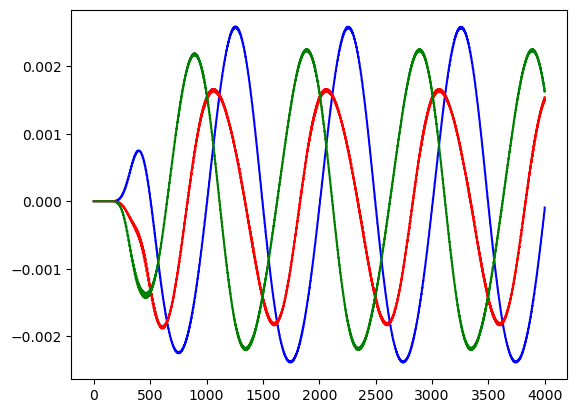

In [5]:
plt.plot(np.arange(nt),LGN[0,0,0,:]-LGN[0,1,0,:],'b')
plt.plot(np.arange(nt),LGN[0,0,0,:]-LGN[0,2,0,:],'r')
plt.plot(np.arange(nt),LGN[0,1,0,:]-LGN[0,2,0,:],'g')

In [6]:
LGN_sInfo_1 = LGN[0,1,:,:]
LGN_sInfo_2 = LGN[0,0,:,:]
if (LGN_sInfo_2 != LGN_sInfo_1).any():
    for i in range(nLGN):
        if (LGN_sInfo_2[:,i] != LGN_sInfo_1[:,i]).any():
            print(LGN_sInfo_2[:,i] - LGN_sInfo_1[:,i])
            break
else:
    print('no difference in LGN sInfo')

[-2.97785021e-23  1.08877648e-22  1.10635407e-22 -1.90115832e-22
  1.29660561e-22  1.09911624e-22 -1.13116949e-22  2.66248760e-23
 -9.67025835e-23 -1.80118578e-22  6.76220151e-23 -7.50149418e-23
 -2.43036004e-22 -3.97977272e-22 -7.23783036e-25  8.78879401e-24
 -1.62127400e-22 -2.22666681e-22 -9.27476262e-23 -2.50894220e-22
  1.33938636e-22 -6.27106302e-23  1.45376993e-22  1.33744765e-22
  1.48789113e-22 -3.48036243e-22 -2.06329864e-22  9.92616735e-23
  8.58975367e-23 -2.79173457e-22  5.56278962e-23  1.88183589e-22
 -1.91182119e-22  9.78528815e-23  2.08035924e-22 -4.29099943e-23
  1.35554223e-22 -2.63663820e-23  1.10153962e-22 -2.32024162e-22
  1.64712339e-22 -1.07908296e-22  4.31167894e-23  3.99050022e-22
 -1.55639202e-22  7.27401951e-23 -6.77771114e-23 -1.15960382e-22
  6.91471293e-23 -2.00164784e-22  3.28287306e-22  6.92246775e-23
  2.79388330e-22 -1.27799405e-22 -3.25598969e-22 -3.34387763e-22
  1.51270655e-22  1.38397656e-22 -3.86706936e-22  8.52513019e-23
  1.40982596e-22 -2.01004

In [16]:
import numpy as np

fdr = '/root/autodl-tmp/ljy/data_repeat_onlyLGN_nonoise_minimaltest/'
#suffix = '_minimal_test_1'
suffix = '_repeat_1_1'
with open(fdr + 'sample_spikeCount' +  suffix + '.bin', 'rb') as f:
    sampleSize = np.fromfile(f, 'u4', 1)[0]
    sample_t0, t1 = np.fromfile(f, 'f4', 2)
    nt, nLGN = np.fromfile(f, 'u4', 2)
    LGN_sInfo_1 = np.fromfile(f, 'f4', nLGN*nt).reshape(nt,nLGN)
    sampleID_1 = np.fromfile(f, 'u4', sampleSize)
    sample_spikeCount_1 = np.fromfile(f, 'u4', sampleSize)

print(f'nt = {nt}, nLGN = {nLGN}')
print(f'sampleSize: {sampleSize}')
print(f'sample time range {[sample_t0, t1]} ms')
print(f'spikeCount min: {sample_spikeCount_1.min()}, mean: {sample_spikeCount_1.mean()}, max: {sample_spikeCount_1.max()}')

#suffix = '_minimal_test_2'
suffix = '_repeat_2_1'
with open(fdr + 'sample_spikeCount' +  suffix + '.bin', 'rb') as f:
    sampleSize = np.fromfile(f, 'u4', 1)[0]
    sample_t0, t1 = np.fromfile(f, 'f4', 2)
    nt, nLGN = np.fromfile(f, 'u4', 2)
    LGN_sInfo_2 = np.fromfile(f, 'f4', nLGN*nt).reshape(nt,nLGN)
    sampleID_2 = np.fromfile(f, 'u4', sampleSize)
    sample_spikeCount_2 = np.fromfile(f, 'u4', sampleSize)

if (LGN_sInfo_2 != LGN_sInfo_1).any():
    for i in range(nLGN):
        if (LGN_sInfo_2[:,i] != LGN_sInfo_1[:,i]).any():
            print(LGN_sInfo_2[:,i] - LGN_sInfo_1[:,i])
            break
else:
    print('no difference in LGN sInfo')
print(f'spikeCount min: {sample_spikeCount_2.min()}, mean: {sample_spikeCount_2.mean()}, max: {sample_spikeCount_2.max()}')

print(f'total {sum(sample_spikeCount_2 != sample_spikeCount_1)} neurons differ')
difference = sample_spikeCount_2.astype(int) - sample_spikeCount_1.astype(int)
print(f'on average {np.mean(np.abs(difference))} spike difference per neuron, std: {np.std(np.abs(difference))}, range[{difference.min()}, {difference.max()}]')



nt = 4000, nLGN = 512
sampleSize: 3840
sample time range [0.0, 500.0] ms
spikeCount min: 0, mean: 0.4044270833333333, max: 4
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.65835169e-22
 -9.94477891e-22 -9.94477891e-22 -9.94477891e-22 -9.94477891e-22
 -9.94477891e-22 -9.94477891e-22 -9.94477891e-22 -4.82503848e-17
 -4.82503848e-17 -4.82503848e-17 -4.82503848e-17 -4.82503848e-17
 -4.82503848e-17 -4.82503848e-17 -4.82503848e-17 -6.74243647e-15
 -6.74243647e-15 -6.74243647e-15 -6.74243647e-15 -6.74243647e-15
 -6.74243647e-15 -6.74243647e-15 -6.74243647e-15 -1.70169434e-13
 -1.70169434e-13 -1.70169434e-13 -1.70169434e-13 -1.70169434e-13
 -1.70169434e-13 -1.70169434e-13 -1.70169434e-13 -1.87783122e-12
 -1.87783122e-12 -1.87783122e-12 -1.87783122e-12 -1.87783122e-12
 -1.87783122e-12 -1.87783122e-12 -1.87783122e-12 -1.26494371e-11
 -1.26494371e-11 -1.26494371e-11 -1.26494371e-11 -1.26494371e-11
 -1.26494371e-11 -1.26494371e-11 -1.26494371e-11 -6.12452311e-11
 -6.12452311e-11 -6.12452311e-